# Computer Vision Masterclass - Face detection

## OpenCV

### Loading the image

In [1]:
import cv2

librarary function of the opencv lib

# To import Drive into Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image = cv2.imread('/content/drive/MyDrive/images/images/people1.jpg')

# To see Image Properties

In [4]:
image.shape

(1280, 1920, 3)

1280 -wide , 1920-high, 3 planes

In [5]:
#cv2.imshow(image)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
image = cv2.resize(image, (800, 600))
image.shape

(600, 800, 3)

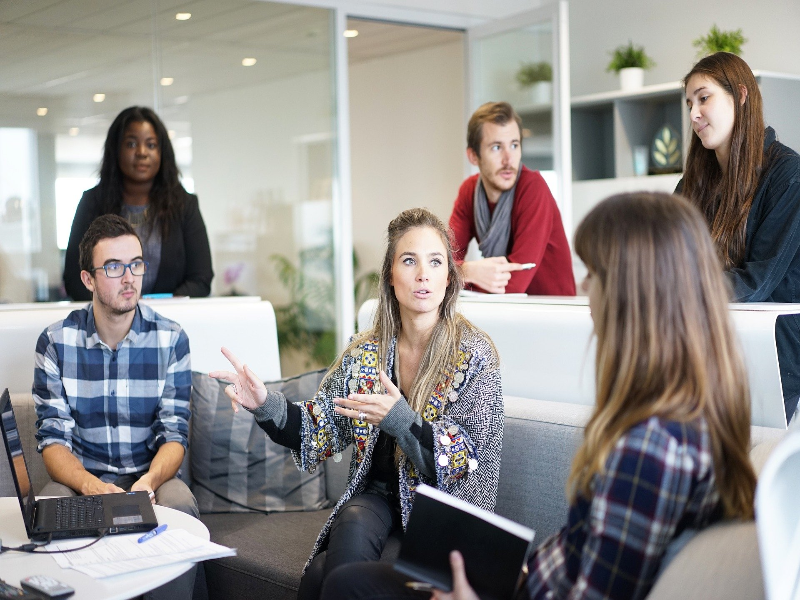

In [7]:
cv2_imshow(image)

In [8]:
600 * 800 * 3, 600 * 800, 1440000 - 480000

(1440000, 480000, 960000)

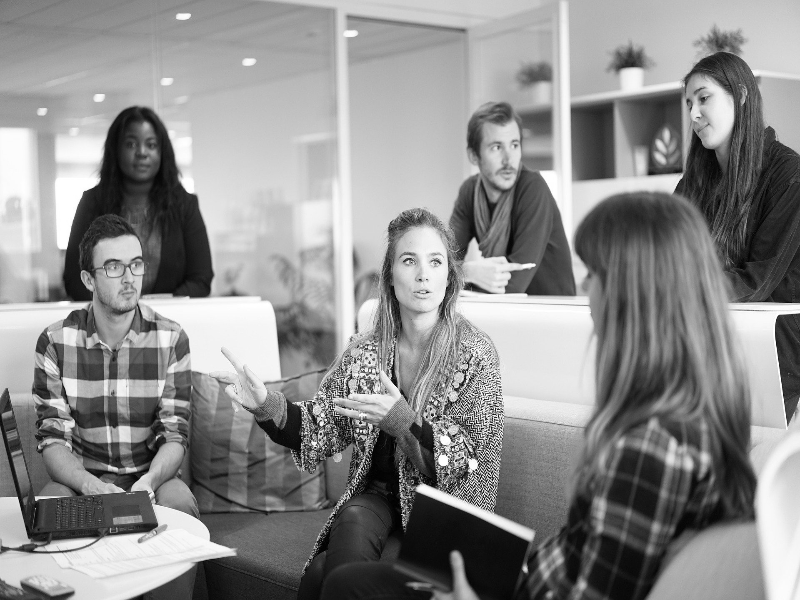

In [9]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

In [10]:
image.shape

(600, 800, 3)

In [11]:
image_gray.shape

(600, 800)

### Detecting faces

In [12]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/haarcascade_frontalface_default.xml')

In [13]:
detections = face_detector.detectMultiScale(image_gray)


In [14]:
detections

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

Each and every row represents the detection of individual face in the picture

In [15]:
len(detections)

6

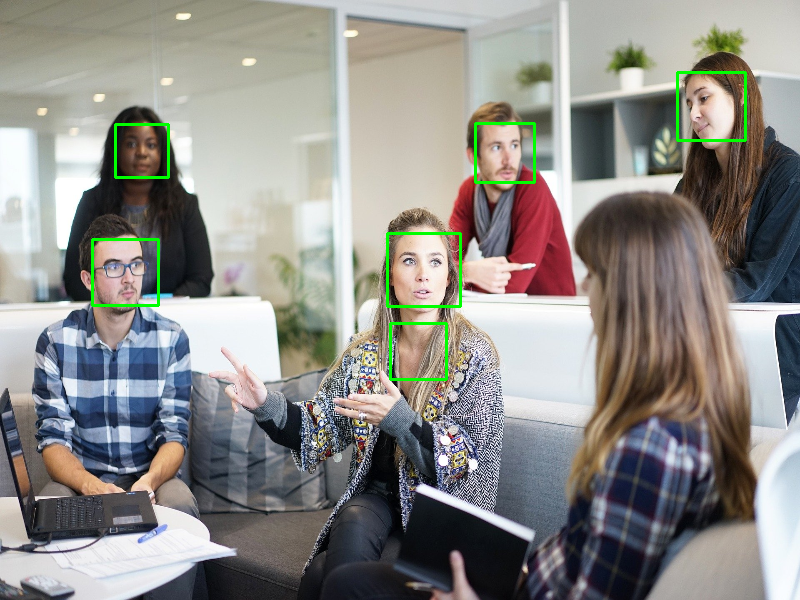

In [16]:
for (x, y, w, h) in detections:
  #print(x, y, w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

### Haarcascade parameters

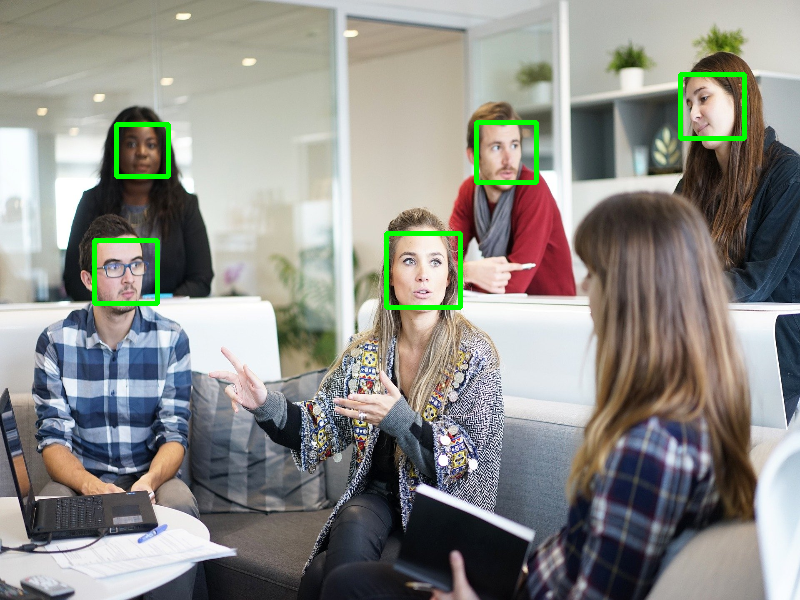

In [17]:
image = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
image = cv2.resize(image, (800,600))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.30)
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 3)
cv2_imshow(image)

scale factor - to scale the face of the image,
*small scale factor value when the image of the face are small
*default value 1.1

50 50
50 50
48 48
47 47
54 54
51 51
51 51
47 47
50 50
52 52
48 48
52 52
48 48


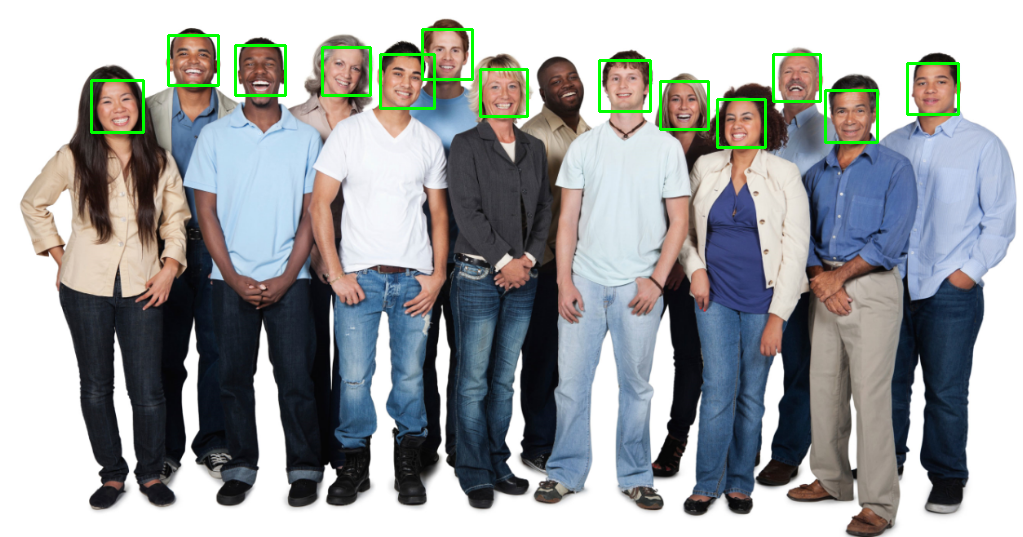

In [18]:
image = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.03, minNeighbors=7,
                                            minSize=(40,40), maxSize=(100,100))
for (x, y, w, h) in detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

min Neighbours represents number of rectangles needed to consider this as a final rectangle - higher the value is the higher the quality

### Eye detection

In [19]:
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/haarcascade_eye.xml')

In [27]:
image = cv2.imread('/content/drive/MyDrive/images/people1.jpg')
#image = cv2.resize(image, (800, 600))
print(image.shape)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_detections = face_detector.detectMultiScale(image_gray, scaleFactor = 1.3, minSize = (40,40))
for (x, y, w, h) in face_detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.06, minNeighbors=9, maxSize=(40,40))
for (x, y, w, h) in eye_detections:
  print(w, h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

### Other objects

#### Cars

36 36
45 45
35 35
45 45


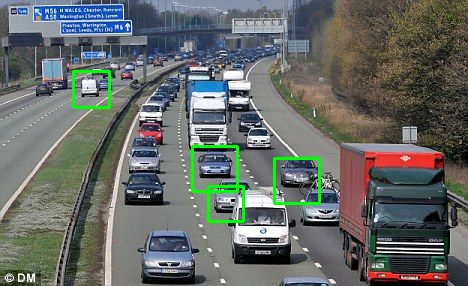

In [34]:
car_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/cars.xml')
image = cv2.imread('/content/drive/MyDrive/images/car.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = car_detector.detectMultiScale(image_gray, scaleFactor = 1.10, minNeighbors=1,minSize=(28,28),maxSize=(50,50))
for (x, y, w, h) in detections:
  print(w,h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Clocks

103 103
98 98
104 104
91 91
93 93
70 70
99 99


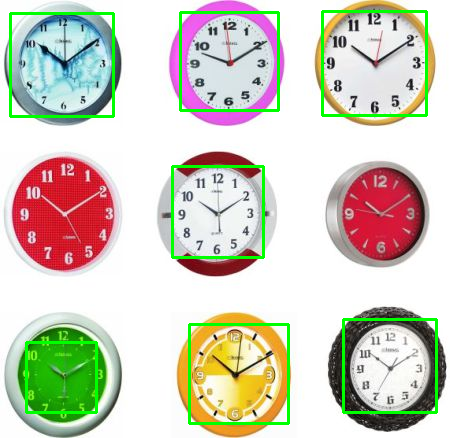

In [63]:
clock_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/clocks.xml')
image = cv2.imread('/content/drive/MyDrive/images/clock.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = clock_detector.detectMultiScale(image_gray,scaleFactor=1.03,minNeighbors=1)
for (x, y, w, h) in detections:
  print(w,h)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### Full body

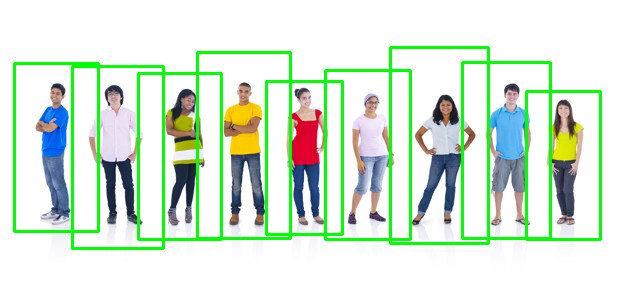

In [61]:
full_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/fullbody.xml')
image = cv2.imread('/content/drive/MyDrive/images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = full_detector.detectMultiScale(image_gray, scaleFactor = 1.005, minNeighbors=8,
                                              minSize = (65,65))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

## Dlib

In [64]:
import dlib

### Detecting faces with HOG

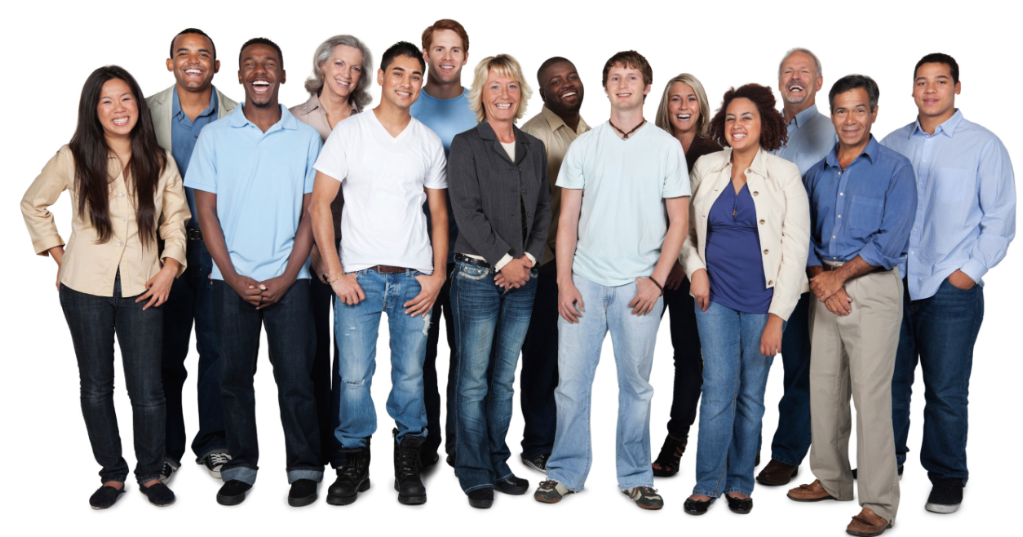

In [65]:
image = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
cv2_imshow(image)

In [66]:
face_detector_hog = dlib.get_frontal_face_detector()

In [68]:
detections = face_detector_hog(image, 1)

In [70]:
detections, len(detections)

(rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]],
 14)

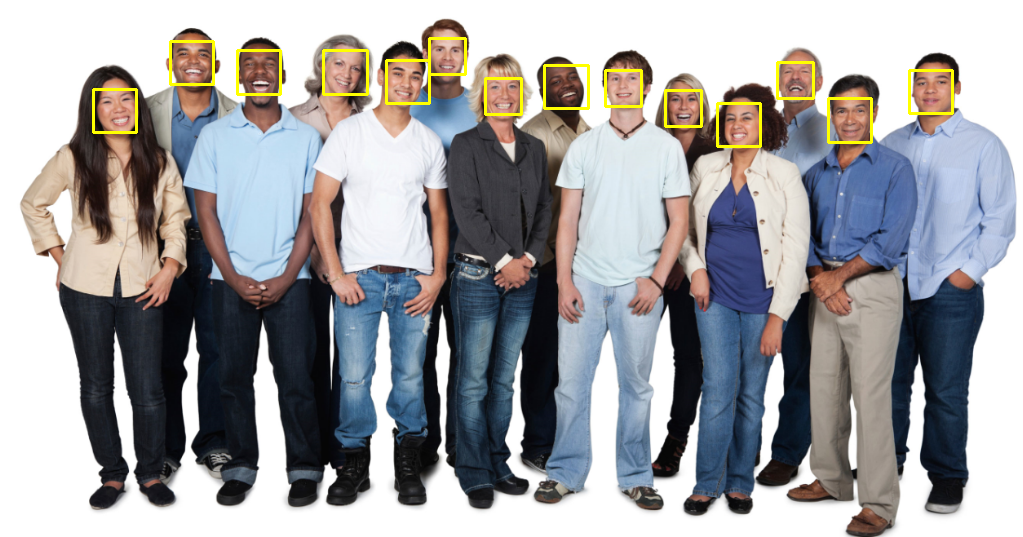

In [69]:
for face in detections:
  #print(face)
  #print(face.left())
  #print(face.top())
  #print(face.right())
  #print(face.bottom())
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

### Detecting faces with CNN (Convolutional Neural Networks)

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/mmod_human_face_detector (1).dat')

1.1440608501434326
1.1370506286621094
1.127898931503296
1.1200274229049683
1.1149379014968872
1.1131560802459717
1.0975687503814697
1.0942119359970093
1.0853146314620972
1.0801897048950195
1.0800751447677612
1.0784766674041748
1.0664023160934448
1.06417977809906


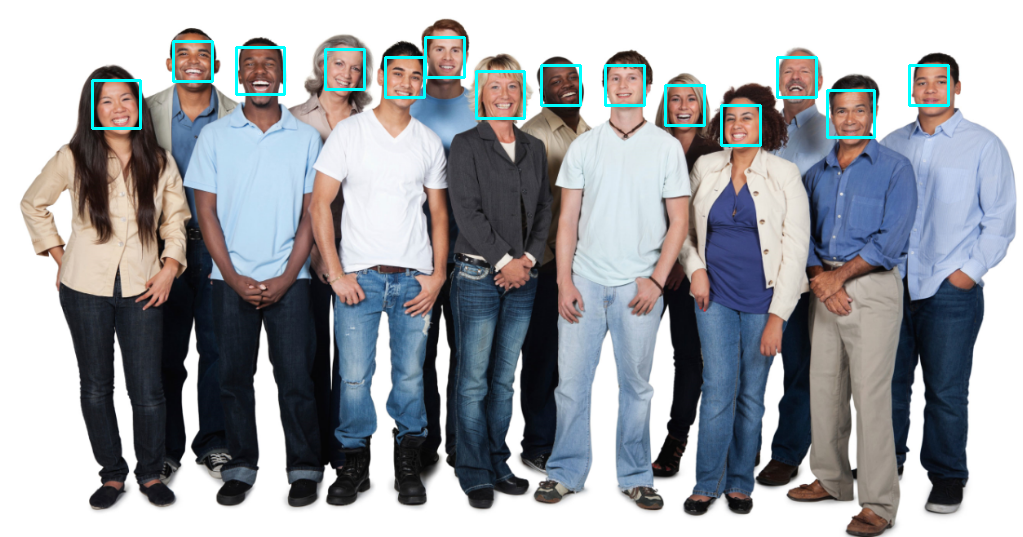

In [ ]:
detections = cnn_detector(image, 1)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)

### Haarcascade x HOG x CNN

#### Haarcascade

In [ ]:
image.shape

(537, 1023, 3)

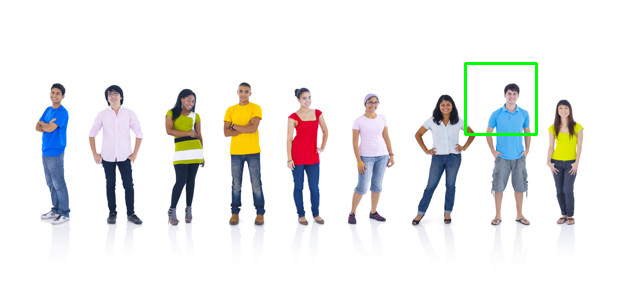

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/people3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
haarcascade_detector = cv2.CascadeClassifier('/content/drive/MyDrive/cascade/cascade/haarcascade_frontalface_default.xml')
detections = haarcascade_detector.detectMultiScale(image_gray, scaleFactor = 1.001, minNeighbors=5, minSize = (5,5))
for (x, y, w, h) in detections:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 2)
cv2_imshow(image)

#### HOG

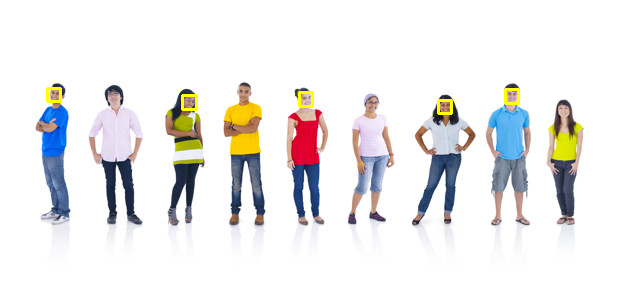

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/people3.jpg')
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 4)
for face in detections:
    l, t, r, b = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
cv2_imshow(image)

#### CNN

0.44638633728027344
0.08115899562835693


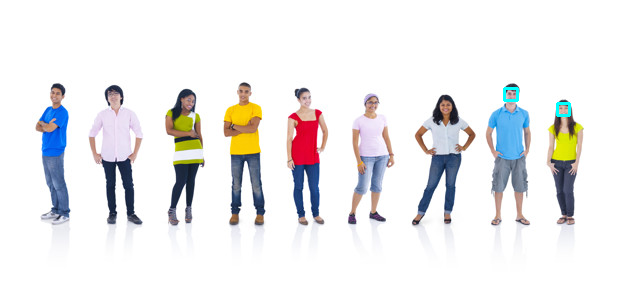

In [ ]:
image = cv2.imread('/content/drive/MyDrive/images/people3.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/mmod_human_face_detector (1).dat')
detections = cnn_detector(image, 4)
for face in detections:
  l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(c)
  cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2_imshow(image)